Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2711 - accuracy: 0.1633 - val_loss: 2.1560 - val_accuracy: 0.2233
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1303 - accuracy: 0.2379 - val_loss: 2.0896 - val_accuracy: 0.2333
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0482 - accuracy: 0.2689 - val_loss: 2.0328 - val_accuracy: 0.2600
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9864 - accuracy: 0.2765 - val_loss: 1.9908 - val_accuracy: 0.2800
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9617 - accuracy: 0.2862 - val_loss: 1.9584 - val_accuracy: 0.3067
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.8984 - accuracy: 0.3215 - val_loss: 1.9193 - val_accuracy: 0.3200
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.8689 - accuracy: 0.3149 - val_loss: 1.8877 - val_accuracy: 0.3233
Epoch 

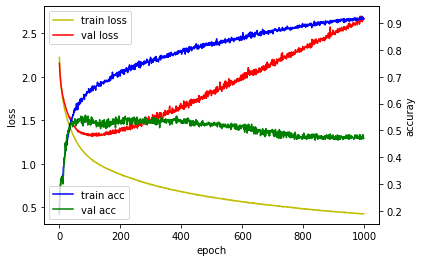

In [6]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.9414 - val_loss: 3.4270 - val_accuracy: 0.4733
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.9414 - val_loss: 3.4361 - val_accuracy: 0.4667
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.9429 - val_loss: 3.4269 - val_accuracy: 0.4633
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.9429 - val_loss: 3.4366 - val_accuracy: 0.4633
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.9429 - val_loss: 3.4293 - val_accuracy: 0.4633
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.9400 - val_loss: 3.4624 - val_accuracy: 0.4667
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.9414 - val_loss: 3.4314 - val_accuracy: 0.4667
Epoch 

epochs : 0
70/70 [==============================] - 0s 3ms/step - loss: 2.3042 - accuracy: 0.0888 - val_loss: 2.2995 - val_accuracy: 0.1033
epochs : 1
70/70 [==============================] - 0s 2ms/step - loss: 2.2953 - accuracy: 0.1286 - val_loss: 2.2905 - val_accuracy: 0.1333
epochs : 2
70/70 [==============================] - 0s 2ms/step - loss: 2.2776 - accuracy: 0.1529 - val_loss: 2.2673 - val_accuracy: 0.1367
epochs : 3
70/70 [==============================] - 0s 2ms/step - loss: 2.2499 - accuracy: 0.1614 - val_loss: 2.2430 - val_accuracy: 0.1267
epochs : 4
70/70 [==============================] - 0s 2ms/step - loss: 2.2232 - accuracy: 0.1686 - val_loss: 2.2165 - val_accuracy: 0.1400
epochs : 5
70/70 [==============================] - 0s 2ms/step - loss: 2.1987 - accuracy: 0.1657 - val_loss: 2.1912 - val_accuracy: 0.1367
epochs : 6
70/70 [==============================] - 0s 2ms/step - loss: 2.1741 - accuracy: 0.1743 - val_loss: 2.1625 - val_accuracy: 0.1733
epochs : 7
70/70 [==

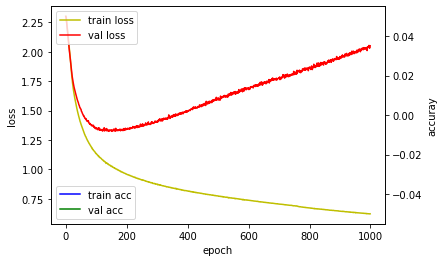

In [11]:
# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
    
# 모델 학습시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()